## Están lloviendo estrellas: un vistazo a Astropy

Por: Alexa Trujillo J.

<img src="pypatagonia.png" style="width:10%" align="center">

<img src="astr.png" style="width:50%">

Paquete Python que unifica herramientas y funcionalidades habituales en astronomía y astrofísica.

Hasta hace varios años, exitían varias librerías astronómicas independientes con funcionalidades específicas como asciidata (catálogos), APLpy (gráficos astronómicos) o pyfits (imágenes y tablas FITS), etc., que eran mantenidas por desarrolladores con su propia sintaxis.

<img src="astropy-logo.png" style="width:10%">

Estructuras de datos y transformaciones
- Constants (astropy.constants), Units and Quantities (astropy.units)
- N-dimensional datasets (astropy.nddata)   
- Data Tables (astropy.table)
- Time and Dates (astropy.time)   
- Astronomical Coordinate Systems (astropy.coordinates)
- World Coordinate System (astropy.wcs)   
- Models and Fitting (astropy.modeling)

Entrada y salida de datos
- FITS File handling (astropy.io.fits)
- ASCII Tables (astropy.io.ascii) 
- Virtual Observatory Access (astropy.vo)

Cosmological Calculations (astropy.cosmology)
- Convolution and filtering (astropy.convolution)
- Data Visualization (astropy.visualization)
- Astrostatistics Tools (astropy.stats)
- And more...

### Constantes astronómicas y unidades

In [1]:
from astropy import constants as C

print(C.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


In [2]:
#permite añadir unidades físicas a números y operar entre ellas
from astropy import units as u

distancia = 25*u.m
tiempo = 3*u.second

velocidad = distancia/tiempo
print(velocidad) 
print(velocidad.to('km/h'))

type(velocidad)

8.333333333333334 m / s
30.0 km / h


astropy.units.quantity.Quantity

### Ejemplito... Cálculo de la velocidad de un satélite 

In [3]:
"""
Ley de la gravitación universal de Newton:  F = G*(Mt*ms)/r^2
   Fuerza centrípeta (cuerpo en rotación): Fc = ms*v^2/r
     
G Mt ms / r2 = ms v2/r
          v2 = G Mt/r
"""

import math

# constante gravitacional
G = C.G 
# masa de la tierra
Mt = C.M_earth
#r = distancia: Rt (radio de la Tierra) + h (altura del satélite)
Rt = C.R_earth 
h = 500*u.kilometer
r = Rt + h
# velocidad del satelite
v2 = G*Mt/r
v = v2**0.5
print(v)
print(v.to("km/h"))

7612.628249643772 m / s
27405.461698717576 km / h


### Otros básicos

**Coordenadas celestes**

El módulo coordinates ofrece clases para representar y manipular varios tipos de coordenadas. La clase principal es SkyCoord, con la que se define un objeto coordenada sobre la que se puede operar. SkyCoord admite varios formatos y opciones, que generalmente hay que indicar al definir el objeto.

**Tablas de datos**

El objeto principal del módulo tables es Table, basado el arrays estructurados de numpy que permite hacer manipulaciones con datos tabulares:

In [4]:
from astropy.coordinates import SkyCoord
from astropy.table import Table

### Imágenes FITS

Flexible Image Transport System es el formato de archivo más utilizado comúnmente en el mundo de la astronomía.
FITS es a menudo utilizado para almacenar también datos que no son imágenes, como espectros electromagnéticos, listas de fotones, cubos de datos, etc.
La mayor ventaja de FITS para datos científicos es que la información de las cabeceras es legible en ASCII, de modo que un usuario puede examinar las cabeceras para investigar un archivo de procedencia desconocida.

La nebulosa Cabeza de Caballo o Barnard 33 es una nube de gas fría y oscura, situada a unos 1500 años luz de la Tierra, al sur del extremo izquierdo del cinturón de Orión.

In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

file = "fits/HorseHead.fits"
# Header Data Unit
hdu_list = fits.open(file)
hdu_list.info()

Filename: fits/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [6]:
#Generalmente, la imagen_data está en el PRIMARY block. 
image_data = hdu_list[0].data 
#Nuestra data ahora esté en un numpy array 2-D. 
print(type(image_data))
print(image_data.shape)

header = hdu_list[0].header
#print(header)

<class 'numpy.ndarray'>
(893, 891)


In [7]:
#close FITS file
hdu_list.close()

In [8]:
#Alternativa: para simplemente leer los datos de la imagen y cerrar el archivo.
image_data = fits.getdata(file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


Text(0.5, 1.0, 'Nebulosa Cabeza de Caballo o Barnard 33')

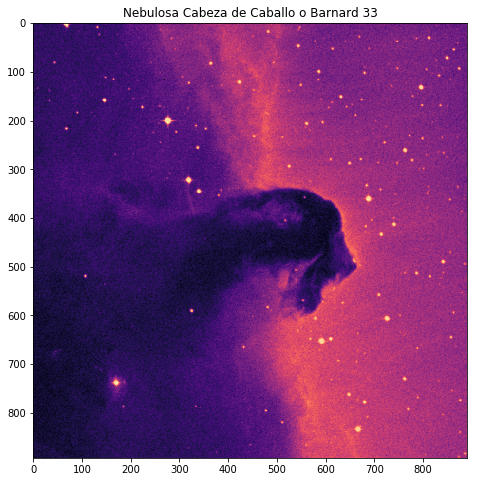

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(image_data,cmap='magma')
plt.title('Nebulosa Cabeza de Caballo o Barnard 33')

## astroquery... Eta Carinae

Astroquery es un conjunto de herramientas para consultar formularios web y bases de datos astronómicas.

World Coordinate System (WCS) transforma ubicaciones de los píxels en una img a sus unidades reales (su posición en el cielo).

Eta Carinae es una estrella del tipo variable luminosa azul hipermasiva, situada en la constelación de la Quilla, alrededor de 7500 años-luz del sistema solar.

In [10]:
from astroquery.skyview import SkyView

eta_images = SkyView.get_images(position='Eta Carinae', survey=['DSS'])
eta = eta_images[0]

In [11]:
from astropy.wcs import WCS

wcs = WCS(eta[0].header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 161.265  -59.6845  
CRPIX : 150.5  150.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00047222219999999997  0.00047222219999999997  
NAXIS : 300  300


Text(0.5, 1.0, 'Eta Carinae')

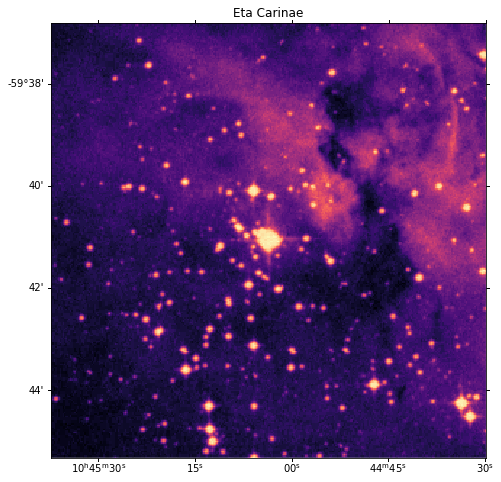

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection':wcs}, figsize=(8,8))
im = ax.imshow(eta[0].data, cmap='magma')
plt.title('Eta Carinae')

## Uso de las tablas Irsa... Nebulosa de Orion o Messier 42

IRSA-NASA proporciona acceso a aproximadamente un billón de mediciones astronómicas, incluida la cobertura de todo el cielo en 24 bandas. 

La nebulosa de Orión, también conocida como Messier 42, M42, o NGC 1976, es una nebulosa difusa situada al sur del cinturón de Orión. Es una de las nebulosas más brillantes que existen, y puede ser observada a simple vista sobre el cielo nocturno.

In [13]:
m42_images=SkyView.get_images(position='M42', survey=['2MASS-K'], pixels=2000)
m42 = m42_images[0]
wcs = WCS(m42[0].header)

In [14]:
from astroquery.irsa import Irsa

Irsa.ROW_LIMIT = 1e6
table = Irsa.query_region("m42", catalog="fp_psc", spatial="Cone", radius=15*u.arcmin)
table2 = table[table['h_m']< 12.]

Text(0.5, 1.0, 'Nebulosa de Orion o Messier 42')

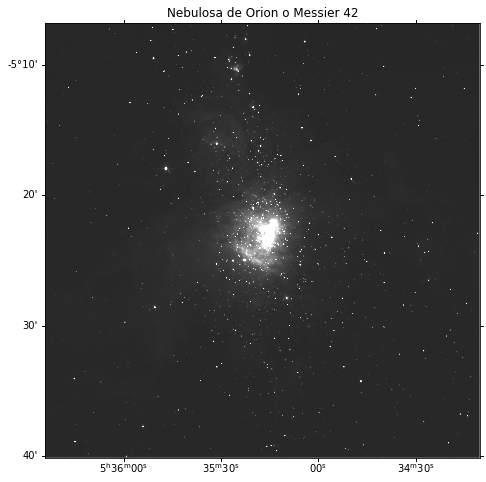

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection':wcs}, figsize=(8,8))
im = ax.imshow(m42[0].data, cmap='gray', vmax=900, interpolation='none')
ax.set_autoscale_on(False)
plt.title('Nebulosa de Orion o Messier 42')

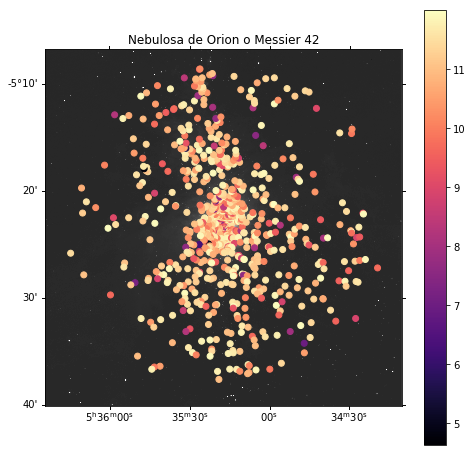

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection':wcs}, figsize=(8,8))
im = ax.imshow(m42[0].data, cmap='gray', vmax=900, interpolation='none')
ax.set_autoscale_on(False)
plt.title('Nebulosa de Orion o Messier 42')
sc = plt.scatter(table2['ra'], table2['dec'], c=table2['h_m'], cmap='magma', transform=ax.get_transform('fk5'))
plt.colorbar(sc)

<img src="TatacoaNight.jpg" style="width:100%" align="center">

OATA Observatorio Astronómico de la Tatacoa, Colombia